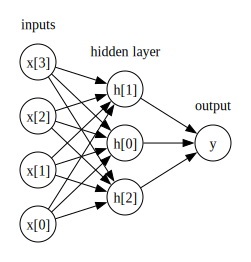

In [1]:
import mglearn 
import sklearn 
import matplotlib.pyplot as plt 
import numpy as np 
import graphviz 
 
from IPython.display import display 
display(mglearn.plots.plot_single_hidden_layer_graph()) 
 


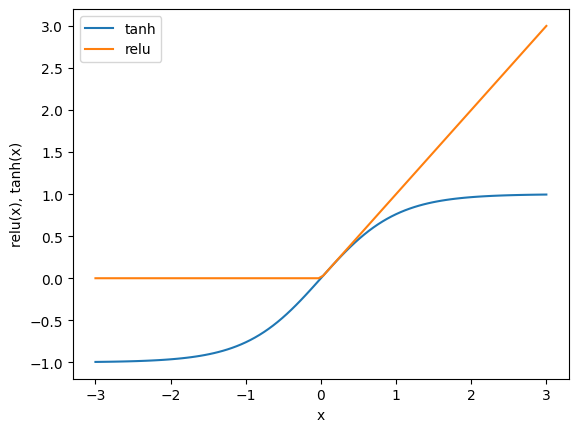

In [2]:
line = np.linspace(-3, 3, 100) 
plt.plot(line, np.tanh(line), label="tanh") 
plt.plot(line, np.maximum(line, 0), label="relu") 
plt.legend(loc="best") 
plt.xlabel("x") 
plt.ylabel("relu(x), tanh(x)") 
plt.show() 
 
mglearn.plots.plot_two_hidden_layer_graph() 
plt.show() 
 


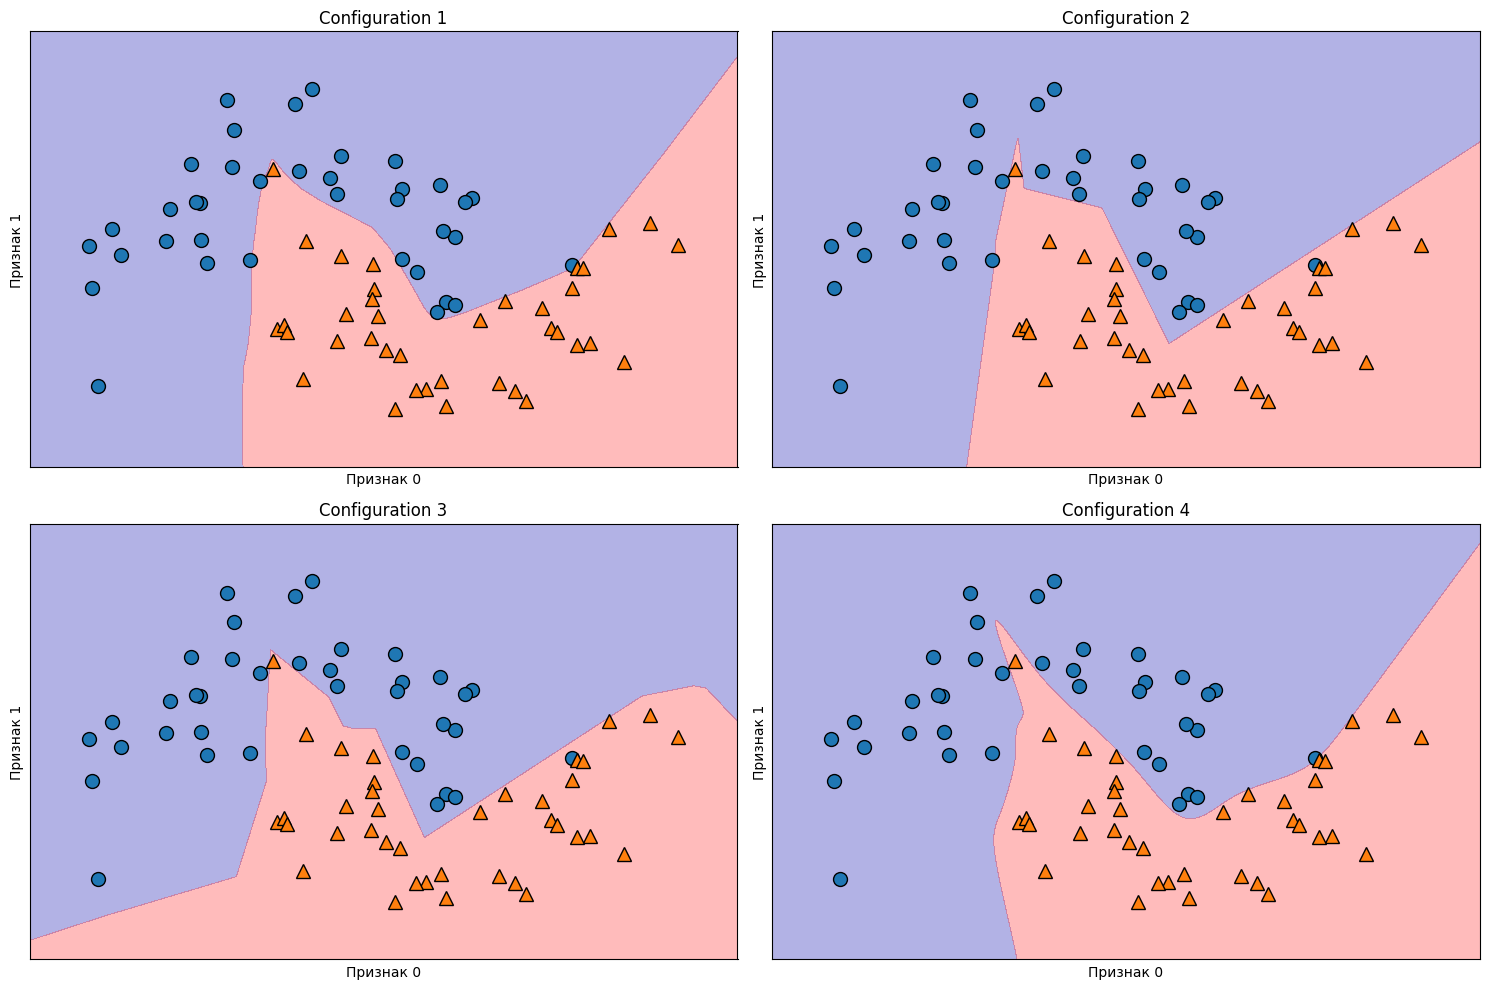

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
import mglearn.plots

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

def plot_mlp_classifier(mlp, X_train, y_train, title):
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
    plt.xlabel("Признак 0")
    plt.ylabel("Признак 1")
    plt.title(title)
    plt.show()

configurations = [
    {'solver': 'lbfgs', 'random_state': 0, 'max_iter': 10000},
    {'solver': 'lbfgs', 'random_state': 0, 'hidden_layer_sizes': [10], 'max_iter': 10000},
    {'solver': 'lbfgs', 'random_state': 0, 'hidden_layer_sizes': [10, 10], 'max_iter': 10000},
    {'solver': 'lbfgs', 'random_state': 0, 'hidden_layer_sizes': [10, 10], 'max_iter': 10000, 'activation': 'tanh'}
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, config in enumerate(configurations):
    mlp = MLPClassifier(**config).fit(X_train, y_train)
    ax = axes[i // 2, i % 2]
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
    ax.set_title(f"Configuration {i+1}")

plt.tight_layout()
plt.show()


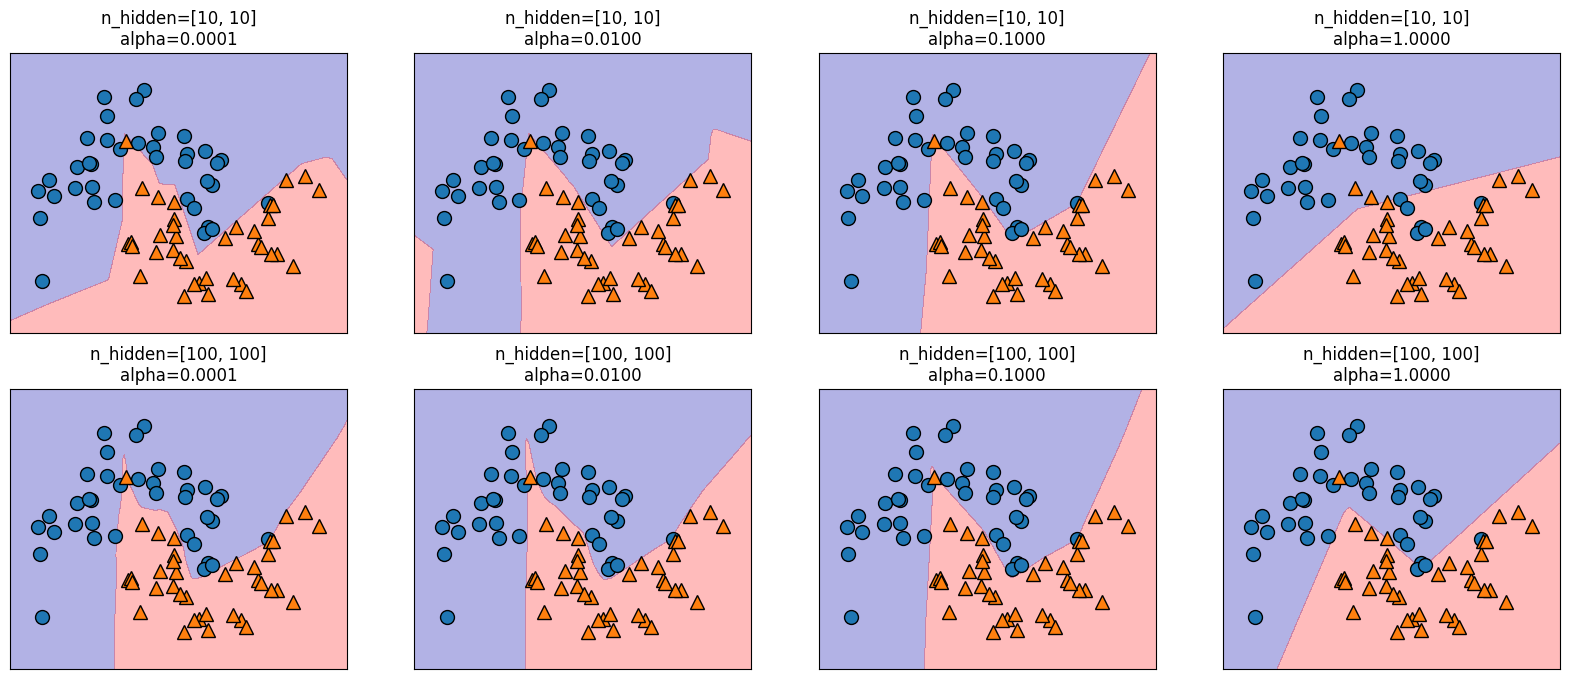

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) 
for axx, n_hidden_nodes in zip(axes, [10, 100]): 
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]): 
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha,max_iter=1000) 
        mlp.fit(X_train, y_train) 
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax) 
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax) 
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format( 
            n_hidden_nodes, n_hidden_nodes, alpha)) 
plt.show() 
 

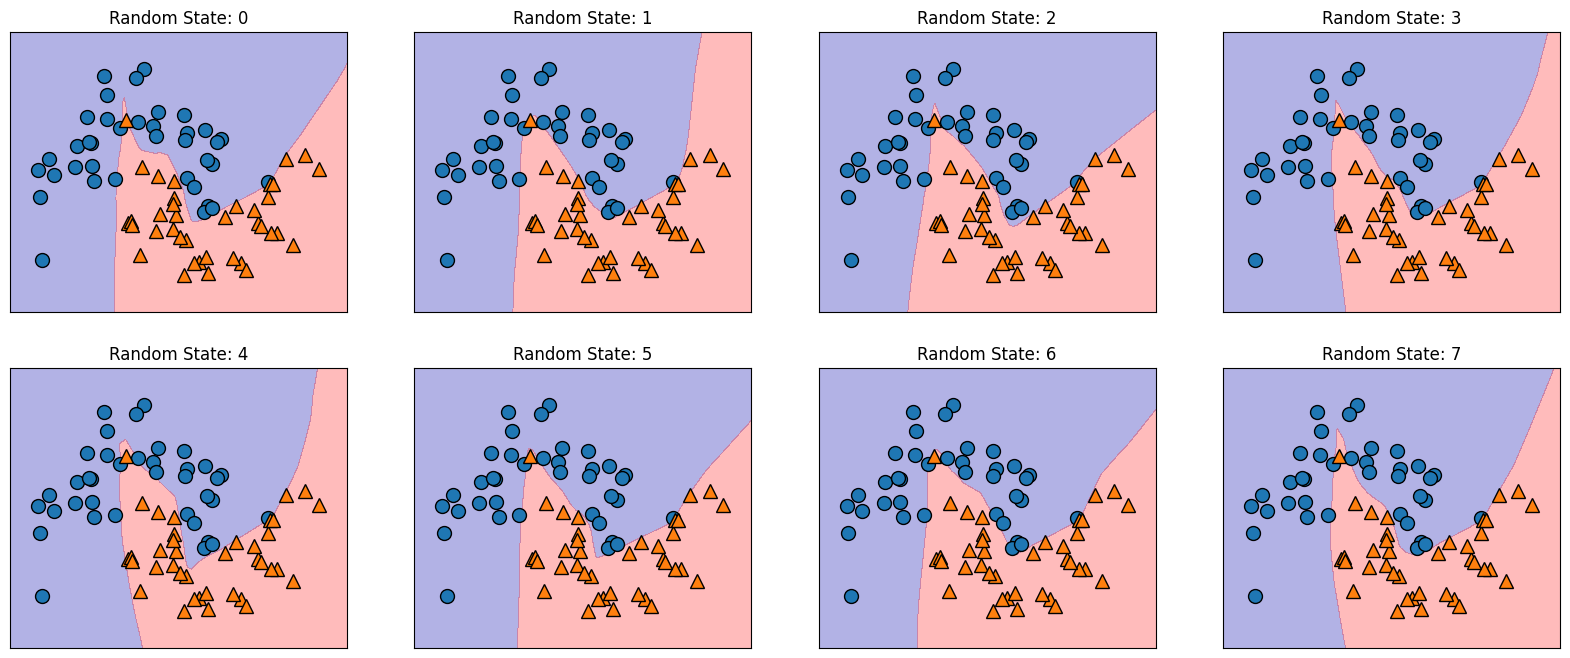

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) 
for i, ax in enumerate(axes.ravel()): 
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100],max_iter=1000) 
    mlp.fit(X_train, y_train) 
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax) 
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title(f'Random State: {i}') 
plt.show() 

Максимальные значения характеристик:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
before scale
Правильность на обучающем наборе: 0.94
Правильности на тестовом наборе: 0.92
after scale
Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.944
scale + alpha 1
Правильность на обучающем наборе: 0.979
Правильность на тестовом наборе: 0.951


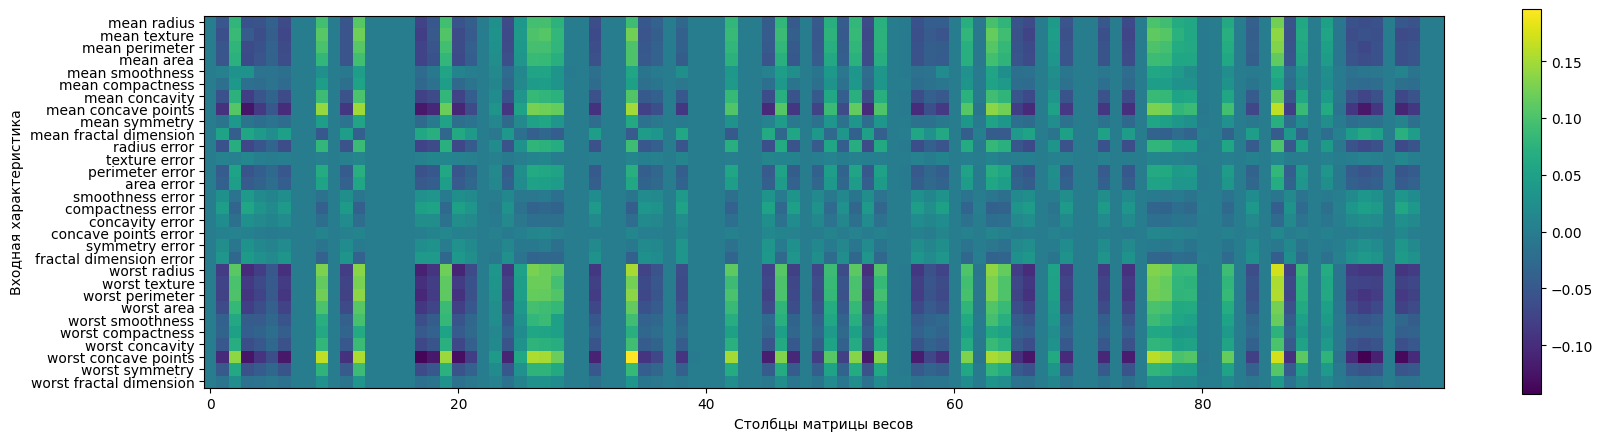

In [6]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 
print("Максимальные значения характеристик:\n{}".format(cancer.data.max(axis=0))) 
 
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0) 
mlp = MLPClassifier(random_state=42,max_iter=1000) 
mlp.fit(X_train, y_train) 

print("before scale")
print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train))) 
print("Правильности на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test))) 
 
min_on_training = X_train.min(axis=0) 
range_on_training = (X_train - min_on_training).max(axis=0) 
X_train_scaled = (X_train - min_on_training) / range_on_training 
 
mean_on_train = X_train.mean(axis=0) 
std_on_train = X_train.std(axis=0) 
X_test_scaled = (X_test - mean_on_train) / std_on_train 
mlp = MLPClassifier(random_state=0,max_iter=1000) 
mlp.fit(X_train_scaled, y_train) 
print("after scale")
print("Правильность на обучающем наборе: {:.3f}".format( mlp.score(X_train_scaled, y_train))) 
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 
print("scale + alpha 1")
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0) 
mlp.fit(X_train_scaled, y_train) 
print("Правильность на обучающем наборе: {:.3f}".format( mlp.score(X_train_scaled, y_train))) 
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 
 
plt.figure(figsize=(20, 5)) 
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis') 
plt.yticks(range(30), cancer.feature_names) 
plt.xlabel("Столбцы матрицы весов") 
plt.ylabel("Входная характеристика") 
plt.colorbar() 
plt.show() 